In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
# To graph the results
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [17]:
# Neural Network as a class
class NN:
    
    # Constructor method
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.__estimator = None 
        self.__history = None
        self.__score_mse_train = None
        self.__score_mae_train = None
        self.__score_mse_test = None
        self.__score_mae_test = None
        self.__score_r2_train = None
        self.__score_r2_test = None
        self.__figure_name = None
        self.__y_pred = None

    
    # Destructor
    def __del__(self):
        print("The Keras Regressor Neural Network has been deleted")
        
    # Create Model
    def create_model(self,opt, loss, fun, init,epo, batch,nn):
        self.opt = opt
        self.loss = loss
        self.fun = fun
        self.init = init
        self.epo = epo
        self.batch = batch
        self.nn = nn

        
        # when X_train (input) is 1 a direct assingment is needed, otherwise there is a problem here inputs= X_train.shape[1]
        if len(self.X_train.shape) == 1:
            inputs= 1
        else: 
            inputs= self.X_train.shape[1]
    
        # Define the keras base model 
        def baseline_model():
            kerasmodel = Sequential()
            kerasmodel.add(Dense(nn[0], input_dim=inputs, kernel_initializer=init, activation=fun))
            kerasmodel.add(Dense(nn[1], kernel_initializer=init, activation=fun))
            kerasmodel.add(Dense(1,kernel_initializer=init))  
            
            # Compile model 
            kerasmodel.compile(loss=loss, optimizer= opt, metrics=['mse', 'mae'])
            return kerasmodel

        self.__estimator = KerasRegressor(build_fn=baseline_model, epochs=epo, batch_size=batch, verbose=0)
        self.__history = self.__estimator.fit(X_train,y_train)
        
        # Prediction
        self.__y_pred = self.__estimator.predict(X_test)
        
        # Quality of the NN  with train data (mae, mse)
        self.__score_mse_train = self.__history.history['mse'][epo-1]
        self.__score_mae_train = self.__history.history['mae'][epo-1]
        self.__score_r2_train = r2_score(y_train, self.__estimator.predict(X_train))

         # Quality of the NN  with test data (mae, mse)
        self.__score_mse_test = mean_squared_error(y_test, self.__y_pred)
        self.__score_mae_test = mean_absolute_error(y_test, self.__y_pred)
        self.__score_r2_test = r2_score(y_test, self.__y_pred)
        
        plt.plot(y_test.values, label="y original")
        plt.plot(self.__y_pred, label="y predicted")
        plt.legend()      
        self.__figure_name = 'figure_NN_Regressor.png'
        plt.savefig(self.__figure_name)
        plt.show()
        plt.close()
    
    def get_score_mse_train(self):
        return self.__score_mse_train

    def get_score_mae_train(self):
        return self.__score_mae_train
    
    def get_score_mse_test(self):
        return self.__score_mse_test

    def get_score_mae_test(self):
        return self.__score_mae_test
    
    def get_score_r2_train(self):
        return self.__score_r2_train

    def get_score_r2_test(self):
        return self.__score_r2_test
    
    def get_figure_name(self):
        return self.__figure_name

    def get_prediction(self, X_data):
        return self.__estimator.predict(X_data)

The Keras Regressor Neural Network has been deleted


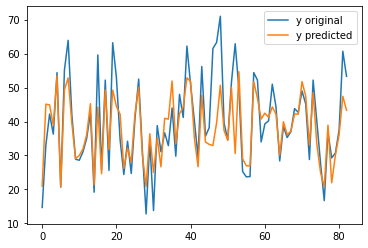

77.53375
5.731546
62.14375231973806
5.234005479927522
0.6023885389934731
0.6371277771365004
figure_NN_Regressor.png
[20.93259  45.117233 44.898605 38.86609  53.48028  20.749569 49.315647
 52.844727 39.488014 29.057756 30.00494  31.92775  36.126686 45.24898
 21.391354 44.232445 24.620926 49.315647 31.723757 49.25435  44.485397
 42.145767 26.195526 32.202663 28.05454  42.253796 50.071724 30.055302
 20.827965 36.3965   24.99303  35.208603 26.646778 40.943382 40.700386
 51.93147  33.473045 42.258713 44.304714 52.88086  51.79667  35.179386
 26.69253  47.689644 33.96215  33.259186 32.95063  39.656967 50.66882
 37.384968 34.453823 50.071724 30.562199 54.6691   29.057756 26.951664
 26.970531 51.76053  46.82895  40.73651  42.47554  41.244503 44.304714
 42.183205 30.084389 39.953606 36.17595  37.12504  42.258713 42.16641
 51.76053  47.517357 33.11721  48.478767 33.36386  24.99699  20.770042
 38.934586 21.95437  30.084389 36.141026 47.436684 43.331253]


In [18]:
seed = 5
np.random.seed(seed)

df=pd.read_excel('/Users/HP14/Documents/THKoln/Semester 1/OOP/Project/Testing/Real estate valuation data set.xlsx')

# Inputs and Outputs 
X=df.drop(columns=['Y house price of unit area', 'No','X1 transaction date',])        # inputs
y=df['Y house price of unit area']                                                    # outputs
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)
  

# optimizer to compile the model
opt='Adam'           # opt = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Nadam', 'RMSprop']

# objective function (losses)
loss = 'MAE'            # loss = ['MAE', 'MSE', 'MAPE']

# activation function
fun='softplus'              # fun = ['relu', 'softplus', 'selu', 'elu']

# initializacion function
init='normal'          # init = ['uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']  

# epochs (one forward pass and one backward pass of all the training examples) the >> the best from 1 to n of samples
epo=100                 # epo = [100, 200, 300]     (the greater, the better)  
# batch_size (the number of training examples in one forward/backward pass) the << the best (until 1)
batch = 5               # batch = [1,2,5]           (the smaller, the better)
# number of neurons in layer 1 and 2
nn = [10,4]             # nn = first value from 8 to 16 and second value from 4 to 10

nn1 = NN(X_train, X_test, y_train, y_test) # creation of the object
nn1.create_model(opt, loss, fun,init,epo, batch, nn) # creation of the model
mse_train=nn1.get_score_mse_train()
print(mse_train)
mae_train=nn1.get_score_mae_train()
print(mae_train)
mse_test=nn1.get_score_mse_test()
print(mse_test)
mae_test=nn1.get_score_mae_test()
print(mae_test)
r2_train=nn1.get_score_r2_train()
print(r2_train)
r2_test=nn1.get_score_r2_test()
print(r2_test)
fig=nn1.get_figure_name()
print(fig)
pred=nn1.get_prediction(X_test)
print(pred)